In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from skimage import io
from skimage import data, filters, util
from skimage.filters import gaussian
from scipy.ndimage import median_filter
from skimage import exposure
from skimage import io, color
from skimage import io, color, img_as_ubyte

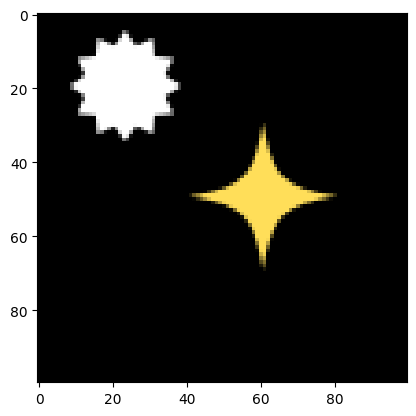

In [21]:
#upload a image
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Select an image file", filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.bmp")])

# Load image
org_image = io.imread(file_path)

if org_image.ndim == 2:
    image = org_image
if org_image.ndim == 3:
    if org_image.shape[-1] == 4:  # Handle alpha channel
        org_image = org_image[..., :3]
    gray_image = color.rgb2gray(org_image)           # float64, 0–1
    gray_image = img_as_ubyte(gray_image)

plt.imshow(org_image)

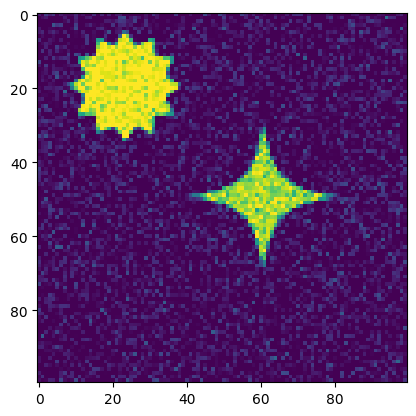

In [22]:
#Add Gaussian noice
noisy_image = util.random_noise(gray_image, mode='gaussian', var=0.01)
noisy_image = (noisy_image*255).astype(np.uint8)
plt.imshow(noisy_image)

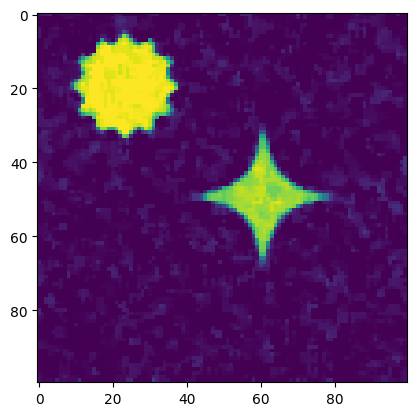

In [23]:
#Pre-processing
denoised_image = gaussian(noisy_image, sigma=1) #clean the image
denoised_image = median_filter(noisy_image, size=3)
plt.imshow(denoised_image)

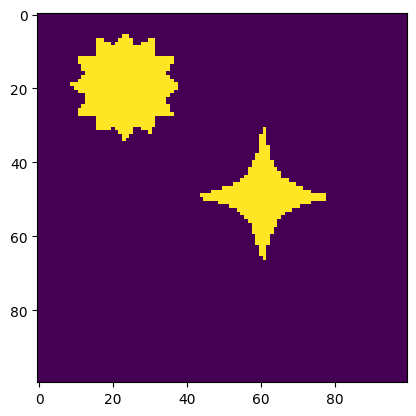

In [24]:
#Apply Otsu's thresholding
thereshould = filters.threshold_otsu(denoised_image)
binary_image = noisy_image > thereshould
plt.imshow(binary_image)

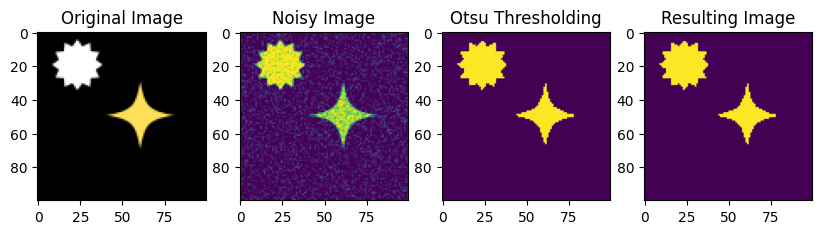

In [28]:
#Display results
plt.figure(figsize=(10,3))
plt.subplot(1,4,1); plt.title('Original Image'); plt.imshow(org_image)
plt.subplot(1,4,2);plt.title('Noisy Image'); plt.imshow(noisy_image)
plt.subplot(1,4,3);plt.title('Otsu Thresholding'); plt.imshow(binary_image)
plt.subplot(1,4,4);plt.title('Resulting Image');plt.imshow(binary_image)
plt.show()

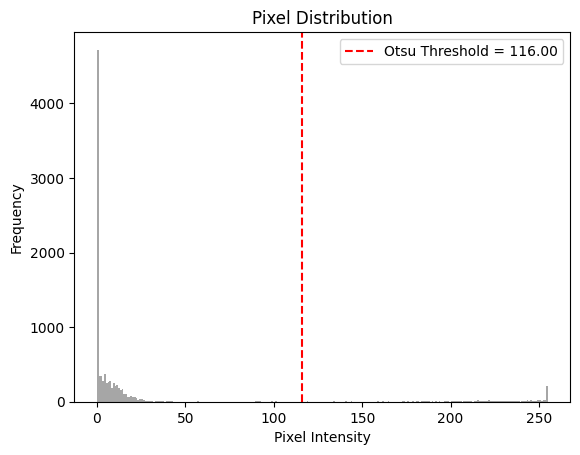

In [29]:
# 5. Histogram + Otsu threshold
plt.title("Pixel Distribution")
plt.hist(denoised_image.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.axvline(thereshould, color='red', linestyle='--', label=f'Otsu Threshold = {thereshould:.2f}')
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency");plt.show()